### Plot cluster and galaxies

Andressa Wille

andressaw2@gmail.com

20/01/2026

* This is a tutorial for plotting a galaxy cluster and highlighting some galaxies other than BCGs. In this example, we are highlighting jellyfish galaxies from Abell 370 (Moretti+2022).

Imports:

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions
from astropy.visualization import simple_norm
import numpy as np

Here we are using the F200W filter. But it is a very large file, so the best practice is to select a region of the cluster that we want to show and ignore the rest. This is written in a .reg file. We also have a .reg file with the location of the jellyfish galaxies and the BCGs. 

In [33]:
fits_path = "./../inputs/data_psf_abell370/f200w.fits"
mosaic_reg_path = "./../inputs/data_psf_abell370/abell370.reg"
reg_path = "./../inputs/data_psf_abell370/jellyfish_plot.reg"
bcg_reg_path = "./../inputs/data_psf_abell370/bcg.reg"

with fits.open(fits_path, memmap=True) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    wcs = WCS(header)

jelly_regions = Regions.read(reg_path, format="ds9")
mosaic_region = Regions.read(mosaic_reg_path, format="ds9")[0]
bcg_regions = Regions.read(bcg_reg_path, format="ds9")

pix_mosaic = mosaic_region.to_pixel(wcs)
bbox = pix_mosaic.bounding_box

xmin, xmax = int(bbox.ixmin), int(bbox.ixmax)
ymin, ymax = int(bbox.iymin), int(bbox.iymax)

data_cut = data[ymin:ymax, xmin:xmax]

wcs_cut = wcs.slice((slice(ymin, ymax), slice(xmin, xmax)))

Set DATE-END to '2022-12-29T10:08:53.279' from MJD-END'. [astropy.wcs.wcs]


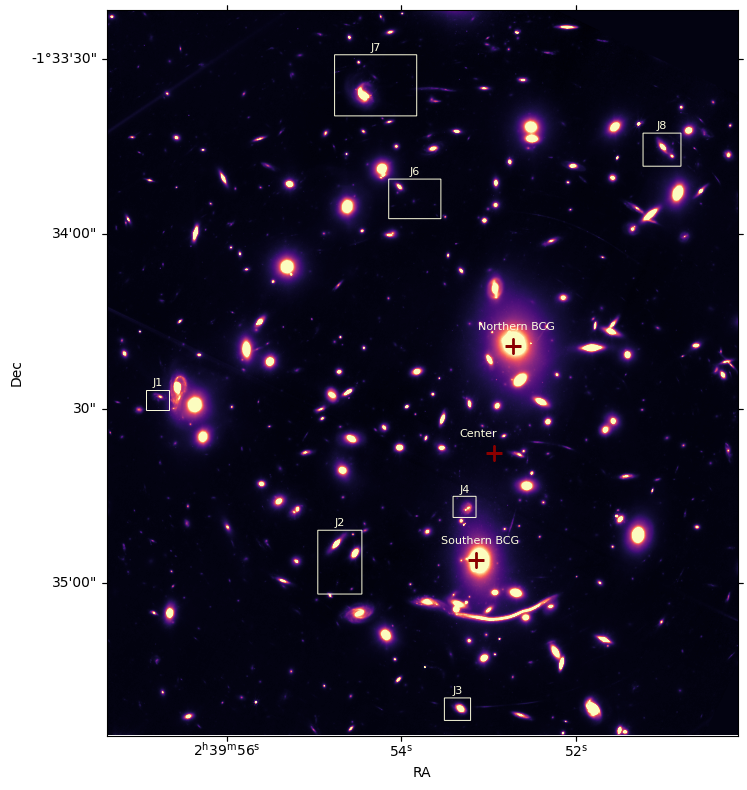

In [37]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wcs_cut)

vmin, vmax = np.percentile(data_cut, [0.05, 99])
norm = simple_norm(data_cut, stretch='log', percent=99)

ax.imshow(data_cut, origin='lower', cmap='magma', vmin=vmin, vmax=vmax)# norm=norm)

for reg in jelly_regions:
    pix_reg = reg.to_pixel(wcs_cut)

    patch = pix_reg.as_artist(
        facecolor='none',
        edgecolor='lightyellow',
        linewidth=0.7)
    ax.add_patch(patch)

    xc, yc = pix_reg.center.x, pix_reg.center.y
    h = pix_reg.height / 2

    label = reg.meta.get('text', None)

    if label is not None:
        ax.text(
            xc, yc + h + 15,   
            label,
            color='lightyellow',
            fontsize=8,
            ha='center',
            va='bottom',
            weight='normal')

for reg in bcg_regions:
    pix_reg = reg.to_pixel(wcs_cut)
    
    xc, yc = pix_reg.center.x, pix_reg.center.y

    ax.plot(
        xc, yc,
        marker='+',
        markersize=12,
        markeredgewidth=2,
        color='darkred')

    label = reg.meta.get('text', None)

    ax.text(
        xc - 300, yc + 120,
        label,
        color='lightyellow',
        fontsize=8,
        ha='left',
        va='bottom',
        weight='normal')

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
plt.tight_layout()
plt.show()
#plt.savefig('./../outputs/abell370_jelly.png', dpi=200)